# **Salary Prediction**

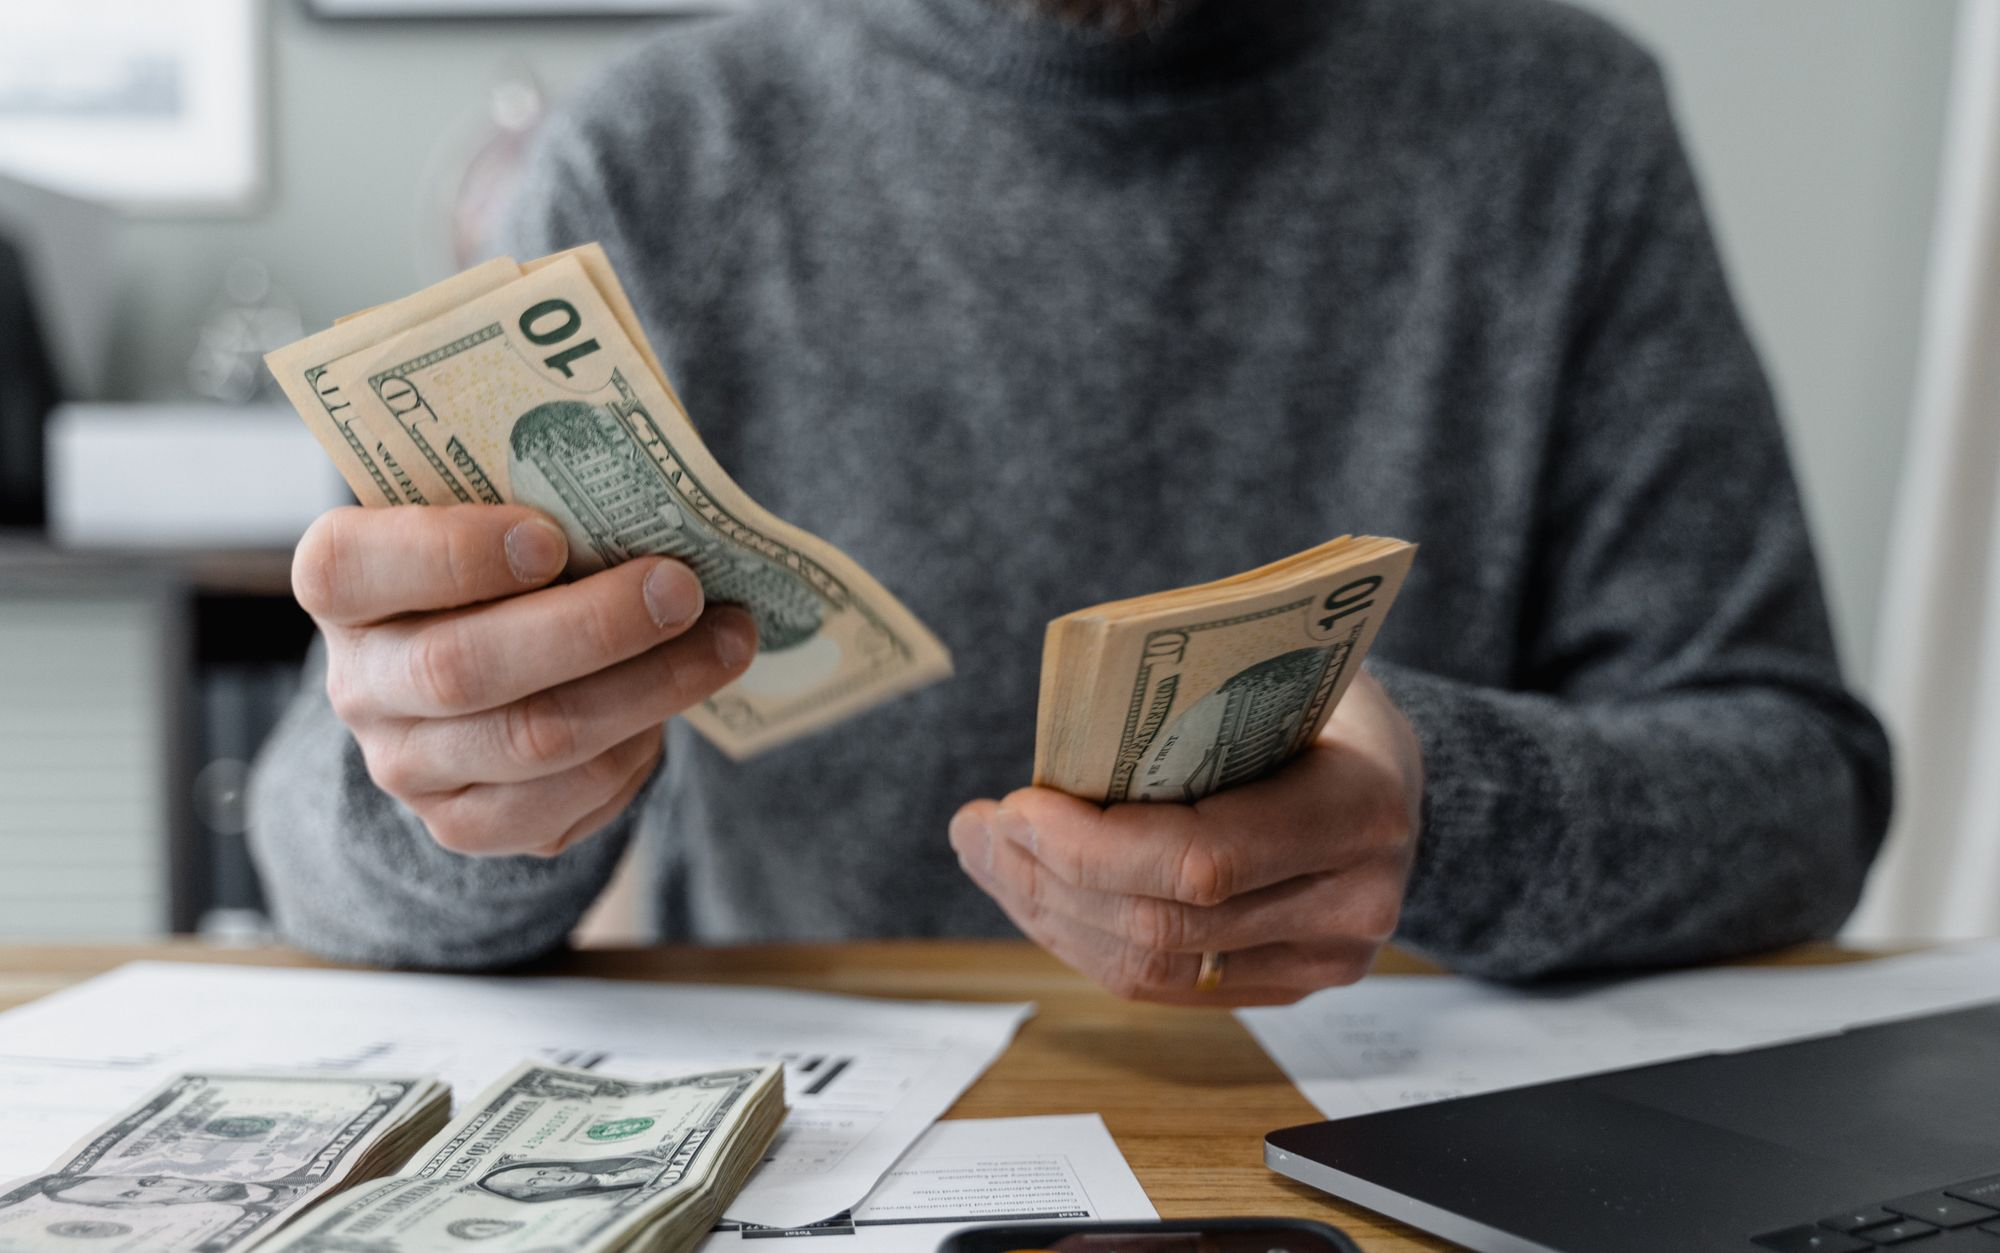

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the required modules, numpy for calculation, and Matplotlib for drawing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Load data
dataset = pd.read_csv("/content/drive/MyDrive/Huawei AI/Task1 Salary/Salary.csv")

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **exploratory data analysis(EDA)**

Now let's go through the features and describe a little. There is a one type of variable

# Quantitative Data:

Continuous Data: It represents the information that could be meaningfully divided into its finer levels. It can be measured on a scale or continuum and can have almost any numeric value.

**YearsExperience and Salary**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.isnull().sum() #checking for total null values

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


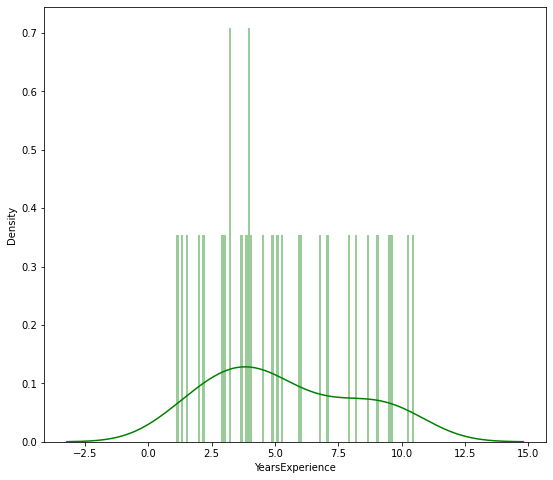

In [ ]:
print(dataset['YearsExperience'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['YearsExperience'], color='g', bins=100, hist_kws={'alpha': 0.4});

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


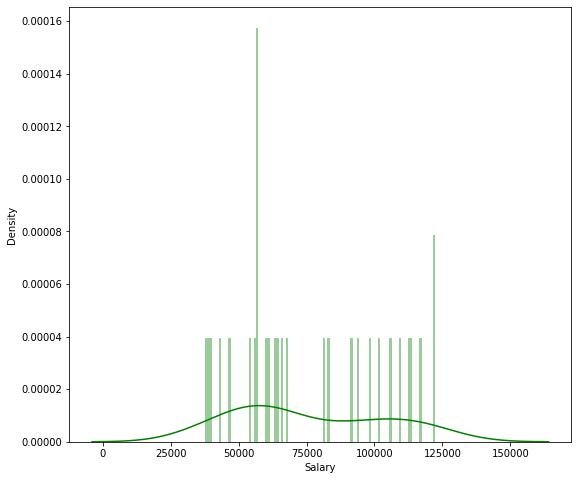

In [ ]:
print(dataset['Salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['Salary'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
dataset.corr().style.background_gradient(cmap='Oranges')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
x= dataset.iloc[:,0].values
y= dataset.iloc[:, -1].values

In [ ]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

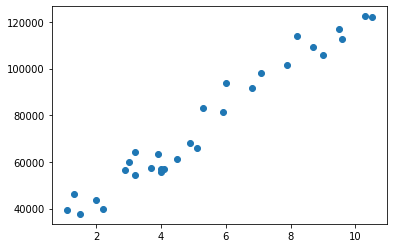

In [ ]:
#Show the effect of a scatter plot
%matplotlib inline
plt.scatter(x,y)

In [ ]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is ax+ b
def model(a, b, x):
  return a*x + b


In [ ]:
#The most commonly used loss function of linear regression model is the loss function of mean variance difference
def loss_function(a, b, x, y):
  num = len(x)
  prediction=model(a,b,x)
  return (0.5/num) * (np.square(prediction-y)).sum()


In [ ]:
#The optimization function mainly USES partial derivatives to update two parameters a and b
def optimize(a,b,x,y):
  num = len(x)
  prediction = model(a,b,x)
#Update the values of A and B by finding the partial derivatives of the loss function on a and b
  da = (1.0/num) * ((prediction -y)*x).sum()
  db = (1.0/num) * ((prediction -y).sum())
  a = a - Lr*da
  b = b - Lr*db
  return a, b

In [ ]:
#iterated function, return a and b
def iterate(a,b,x,y,times):
  for i in range(times):
    a,b = optimize(a,b,x,y)
  return a,b

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=1234)

[0.30075875]
[0.33978499]
[51.49318568] [8.2124773] 3416149702.7482033


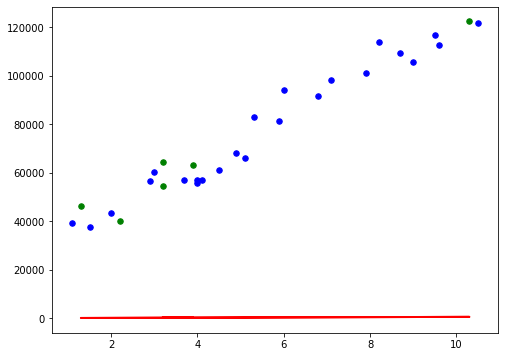

In [ ]:
#Initialize parameters and display
a = np.random.rand(1)
print(a)
b = np.random.rand(1)
print(b)
Lr = 1e-4
#For the first iteration, the parameter values, losses, and visualization after the iteration are displayed
a,b = iterate(a,b,xtrain,ytrain,1)
prediction=model(a,b,xtest)
loss = loss_function(a, b, xtrain, ytrain)
print(a,b,loss)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(xtrain, ytrain, color='b', s=30)
m2 = plt.scatter(xtest, ytest, color='g', s=30)
plt.plot(xtest, prediction, color="red", linewidth=2, label="Prediction")
plt.show()

[12622.03991711] [2245.82169487] 60933690.05020434


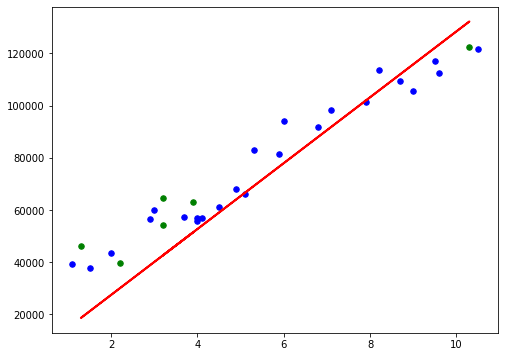

In [ ]:
a,b = iterate(a,b,xtrain,ytrain,1000)
prediction=model(a,b,xtest)
loss = loss_function(a, b, xtrain, ytrain)
print(a,b,loss)
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(xtrain, ytrain, color='b', s=30)
m2 = plt.scatter(xtest, ytest, color='g', s=30)
plt.plot(xtest, prediction, color="red", linewidth=2, label="Prediction")
plt.show()


In [ ]:
def score(ytrue, ypred):
    Cmatrix = np.corrcoef(ytrue, prediction)
    print(Cmatrix)
    corr = Cmatrix[0, 1]
    return corr ** 2

print(score(ytest, prediction))

[[1.         0.98090331]
 [0.98090331 1.        ]]
0.9621712966155151


In [ ]:
a,b

(array([12622.03991711]), array([2245.82169487]))

In [ ]:
prediction=model(a,b,10)
prediction

array([128466.22086599])